In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(iris.shape)

(150, 5)


Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.

In [5]:
print(iris.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Observation - Iris is a balanced dataset as the number of data points for every class is 50

## 2-D Scatter Plot

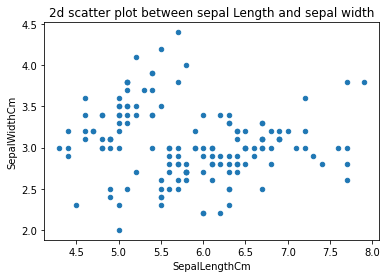

In [7]:
iris.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm');
plt.title('2d scatter plot between sepal Length and sepal width')
plt.show()

Observations: 
    1. we cannot make much sense out it.
    2. What if we color the points by thier class-label/flower-type

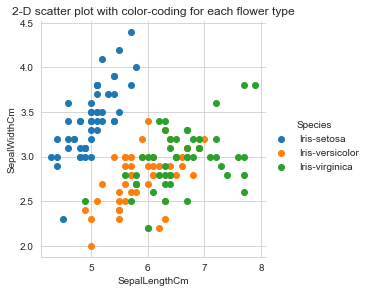

In [8]:
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue = 'Species', size = 4)\
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
.add_legend();
plt.title('2-D scatter plot with color-coding for each flower type')
plt.show()

Observations:
1. Using sepal length and sepal width features, we can distinguish setosa flowers from others.
2. Separating versicolor and virginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

## Pair-Plot

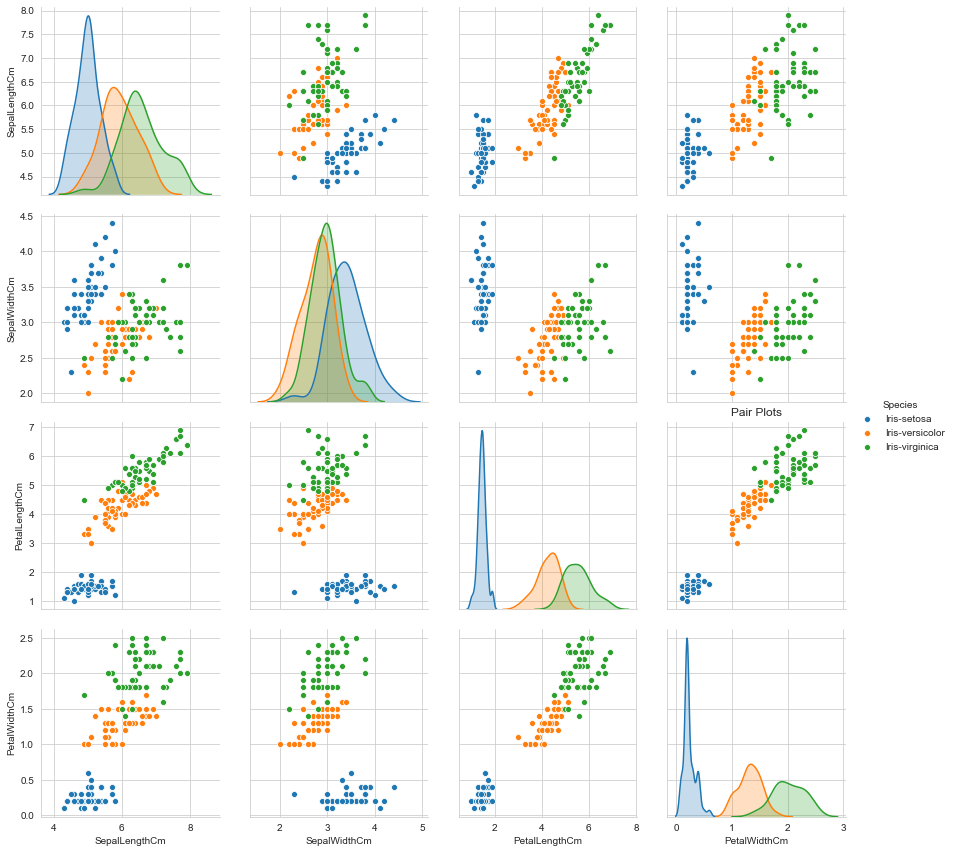

In [10]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(iris, hue = "Species", size = 3);
plt.title("Pair Plots")
plt.show()

Observations:
    1. petal length and petal width are the most useful features to identify various flower types
    2. while setosa can be easily identified (linearly Seperable), virginica and versicolor have some overlap (almost linearly separable).
    3. We can find lines and if-else conditions to build a simple model to classify the flower types.

## Histogram, PDF, CDF

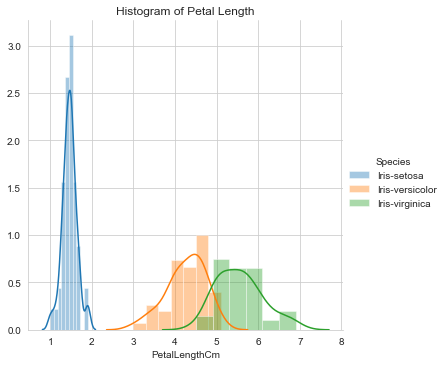

In [12]:
sns.FacetGrid(iris, hue = 'Species', size = 5)\
.map(sns.distplot, "PetalLengthCm") \
.add_legend();
plt.title("Histogram of Petal Length")
plt.show();

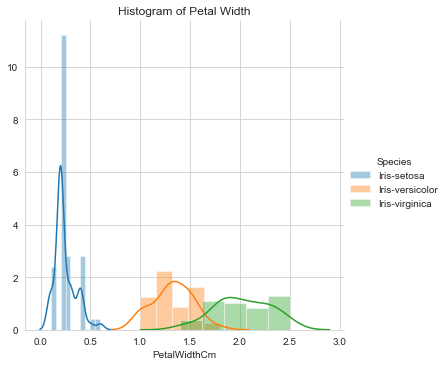

In [15]:
sns.FacetGrid(iris, hue = "Species", size = 5) \
.map(sns.distplot, "PetalWidthCm")\
.add_legend();
plt.title('Histogram of Petal Width')
plt.show()

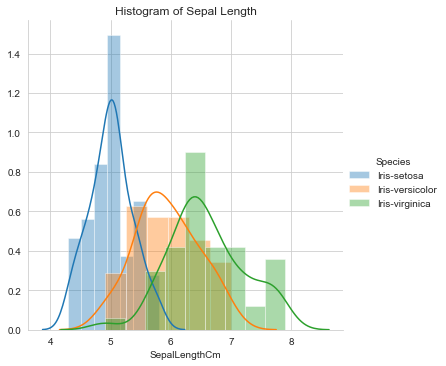

In [16]:
sns.FacetGrid(iris, hue = "Species", size = 5)\
.map(sns.distplot, "SepalLengthCm")\
.add_legend();
plt.title("Histogram of Sepal Length");
plt.show();

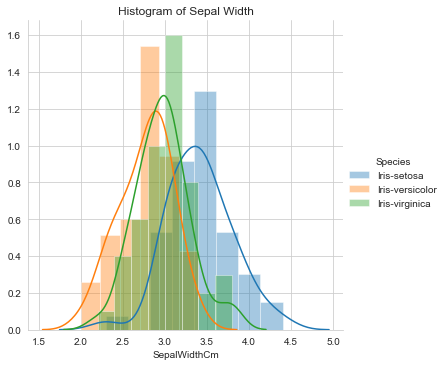

In [17]:
sns.FacetGrid(iris, hue = "Species", size = 5)\
.map(sns.distplot, 'SepalWidthCm')\
.add_legend();
plt.title('Histogram of Sepal Width');
plt.show();

Observations:
1. By Performing Histogram plots, it is clear that Petal length and petal width are benificial.
2. It is difficult to identify the different flower types using Sepal Length and Sepal Width, Because those are overlapping.

## CDF

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
11.11111111111111
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


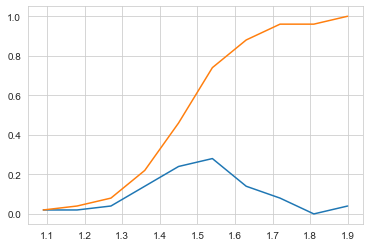

In [22]:
counts, bin_edges = np.histogram(iris.loc[iris['Species'] == 'Iris-setosa']['PetalLengthCm'], 
                                 bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(counts)
print(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf);
plt.show();

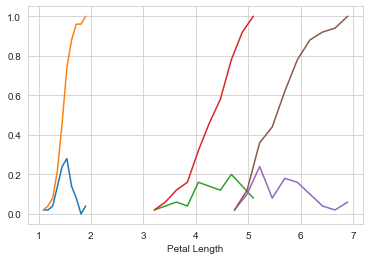

In [25]:
# CDF, PDF of Petal Lengths for all the flower types

#setosa
counts, bins = np.histogram(iris.loc[iris['Species'] == 'Iris-setosa']['PetalLengthCm'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)

#versicolor
counts, bins = np.histogram(iris.loc[iris['Species'] == 'Iris-versicolor']['PetalLengthCm'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)

#virginica
counts, bins = np.histogram(iris.loc[iris['Species'] == 'Iris-virginica']['PetalLengthCm'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)

plt.xlabel('Petal Length')
plt.show()


## Mean, Variance and Standard Deviation

In [29]:
iris_setosa = iris.loc[(iris['Species'] == 'Iris-setosa')]
iris_versicolor = iris.loc[(iris['Species'] == 'Iris-versicolor')]
iris_virginica = iris.loc[(iris['Species'] == 'Iris-virginica')]

In [31]:
print('Means:');
print(np.mean(iris_setosa['PetalLengthCm']))
print(np.mean(iris_versicolor['PetalLengthCm']))
print(np.mean(iris_virginica['PetalLengthCm']))

print('\nStandard Deviation: ');
print(np.std(iris_setosa['PetalLengthCm']));
print(np.std(iris_versicolor['PetalLengthCm']));
print(np.std(iris_virginica['PetalLengthCm']));


Means:
1.464
4.26
5.552

Standard Deviation: 
0.17176728442867115
0.4651881339845204
0.5463478745268441


Observations:
    1. Setosa tends to have much smaller petal length(1.464) compared to versicolor(4.26) and virginica(5.5).
    2. So Petal lengths are in the order setosa < versicolor < virginica
    3. Setosa tends to have lower spread/ much thinner spread when compared to versicolor and virginica
    4. By seeing the mean and SD, For setosa majority of the points are lie between (1.46 - 0.17) <= 1.46 <= (1.46 + 0.17) 

## Median, Percentile, Quantile, Inter-Quartile Range(IQR), Median Absolute Deviation(MAD)

In [35]:
print("Medians: ");
print(np.median(iris_setosa['PetalLengthCm']));
print(np.median(iris_versicolor['PetalLengthCm']));
print(np.median(iris_virginica['PetalLengthCm']));

print("\nQuantiles: ");
print(np.percentile(iris_setosa['PetalLengthCm'], np.arange(0, 100, 25)));
print(np.percentile(iris_versicolor['PetalLengthCm'], np.arange(0, 100, 25)));
print(np.percentile(iris_virginica['PetalLengthCm'], np.arange(0, 100, 25)));

print("\n90th Percentile");
print(np.percentile(iris_setosa['PetalLengthCm'], 90));
print(np.percentile(iris_versicolor['PetalLengthCm'], 90));
print(np.percentile(iris_virginica['PetalLengthCm'], 90));

from statsmodels import robust
print('\nMedian Absolute Deviation')
print(robust.mad(iris_setosa['PetalLengthCm']));
print(robust.mad(iris_versicolor['PetalLengthCm']));
print(robust.mad(iris_virginica['PetalLengthCm']));

Medians: 
1.5
4.35
5.55

Quantiles: 
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th Percentile
1.7
4.8
6.3100000000000005

Median Absolute Deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211


Observations:
    1. Median values are similar to mean and MAD values are similar to Standard Deviation.
    2. Minimum Petal Length of setosa is 1 and 50% of values lie between 1.4 and 1.575
    3. Minimum PL of versicolor is 3 and 50% of values are lie between 4 and 4.6
    4. Minimum PL of virginica is 4.5 and 50% of the values lie between 5.1 to 5.875

## Box Plots and Whiskers

Another method to visualize the 1D scatter plots. This box plots also include the percetiles(25th, 50th, 75th)


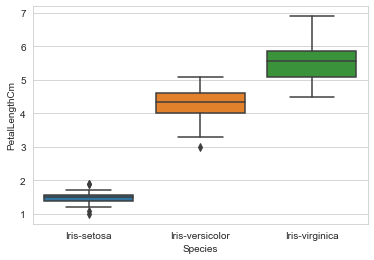

In [36]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.show()

## Violin plots

Combination of Histogram, PDF and box-plot

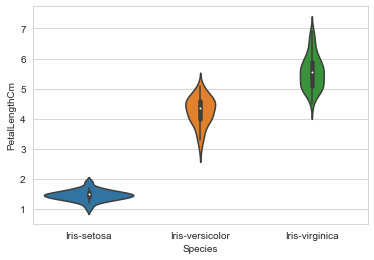

In [37]:
sns.violinplot(x = "Species", y = "PetalLengthCm", data = iris, size = 8)
plt.show()

Observations:
    1. setosa is more denser when compared to versicolor and virginca
    2. virginica is more sparsely spread

## Multivariate probability density, countour plot

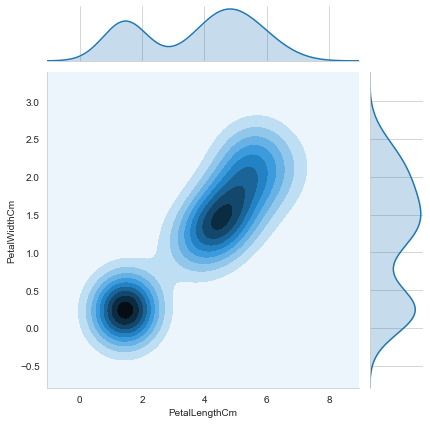

In [41]:
sns.jointplot(x = "PetalLengthCm", y = "PetalWidthCm", data = iris, kind = "kde")
plt.show()